In [0]:
import os
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/Datamining/TextMining/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
!cp "/content/drive/My Drive/Datamining/TextMining/Notebooks/functions.py" .
import functions as f
import importlib
importlib.reload(f)
f.v()

2020-05-30 20:58


In [0]:
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from keras.initializers import Constant
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using TensorFlow backend.


True

In [0]:
def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
df = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1mE-QcKMxy70Xt5OoVb8s0GqjS7jQiBD12WzxtmcNQck/edit#gid=1204809874');
df

,text,is_spam,is_news,sentiment
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,False,0.0,1.0
1,China Authorities Probe Alleged Illegal Bitcoi...,False,1.0,-1.0
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,False,1.0,1.0
3,Pretty cool concept. 👍 $CHR #crypto #cryptocu...,True,NaN,NaN
4,"Crypto Market Hits $200 Billion, Bitcoin Ralli...",True,NaN,NaN
...,...,...,...,...
995,@CNBC @CNBCMakeIt He says if you make 70K a ye...,False,0.0,1.0
996,https://t.co/U6p7FgOdd8 via @BitcoinEcho,False,0.0,0.0
997,The last time BTC closed above 12k for the wee...,False,0.0,1.0
998,https://t.co/o5jXwqEdbn is for #sale!#domain #...,True,NaN,NaN


In [0]:
df = df[df['is_spam'] == False]
df['is_news'] = df['is_news'].apply(lambda x: True if x == 1.0 else False)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,is_spam,is_news,sentiment
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,False,False,1.0
1,China Authorities Probe Alleged Illegal Bitcoi...,False,True,-1.0
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,False,True,1.0
5,Study Finds Most Ransomware Solutions Just Pay...,False,True,1.0
6,"Oh man that $6,400 resistance was really tough...",False,False,-1.0
...,...,...,...,...
993,@ThomasSchuIz Been doing both....luv it! Let m...,False,False,1.0
994,@girevik_ Which parameters for network effect ...,False,False,1.0
995,@CNBC @CNBCMakeIt He says if you make 70K a ye...,False,False,1.0
996,https://t.co/U6p7FgOdd8 via @BitcoinEcho,False,False,0.0


In [0]:
df_val = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1G0sY49Ct5AU3OAV-kVU1SSJP9_-ci8N0aCvX00e2Gkg/edit#gid=2038236874')
df_val

,text,is_spam,is_news,sentiment
0,#BTC #Bitcoin to 7500$ and after this back to ...,False,0.0,1.0
1,@APompliano @McDonalds What is the cost of tra...,False,0.0,0.0
2,"Selling at 6,500USD. Bye Bitcoin Co. Ltd. htt...",False,0.0,-1.0
3,Lets play a game as we wait for Bakkt 10K BTC ...,False,0.0,1.0
4,@GoonAlerts_ Favorite coin @sentivate $SNTVT I...,False,0.0,1.0
...,...,...,...,...
495,#Blockchain #Crypto #Bitcoin #Ethereum #Tradin...,True,NaN,NaN
496,@CalvinAyre according to your mother bitcoin i...,False,0.0,1.0
497,Sold this put last week when bitcoin was above...,False,0.0,1.0
498,Block 598628 Hash: 0x...0df6063fdfd137f13322f9...,True,NaN,NaN


In [0]:
df_val = df_val[df_val['is_spam'] == False]
df_val['is_news'] = df_val['is_news'].apply(lambda x: True if x == 1.0 else False)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,is_spam,is_news,sentiment
0,#BTC #Bitcoin to 7500$ and after this back to ...,False,False,1.0
1,@APompliano @McDonalds What is the cost of tra...,False,False,0.0
2,"Selling at 6,500USD. Bye Bitcoin Co. Ltd. htt...",False,False,-1.0
3,Lets play a game as we wait for Bakkt 10K BTC ...,False,False,1.0
4,@GoonAlerts_ Favorite coin @sentivate $SNTVT I...,False,False,1.0
...,...,...,...,...
491,PURA – Puration To Introduce New CBD Infused C...,False,False,0.0
492,##Bitcoin Showing Signs of Forming a Long-Term...,False,False,1.0
493,@Crypto_Guy_UK you do understand China are inv...,False,False,-1.0
496,@CalvinAyre according to your mother bitcoin i...,False,False,1.0


# Preparacion de datos para las RNN

In [0]:
x_dev_text = df['text'].apply(f.normalizeForTokenization)
y_dev = df['is_news']
x_test_text = df_val['text'].apply(f.normalizeForTokenization)
y_test = df_val['is_news']

In [0]:
vocab_size = 10000+1
embedding_dim = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
validation_size = 0.2

# Seteamos max_length teniendo en cuenta el largo promedio de los tweets
max_length = 50

In [0]:
x_train_text, x_validation_text, y_train, y_validation = train_test_split(x_dev_text, y_dev, test_size = validation_size, random_state=1234)

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train_text)
x_train = tokenizer.texts_to_sequences(x_train_text)
x_validation = tokenizer.texts_to_sequences(x_validation_text)
x_test = tokenizer.texts_to_sequences(x_test_text)

In [0]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_validation = pad_sequences(x_validation, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(x_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Naive Bayes

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_dev_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_test_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_dev)
pred = NB_model.predict(x_validation_NB)

In [0]:
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred),
    'precision': precision_score(y_test, pred)
}

{'accuracy': 0.8092307692307692,
 'f1': 0.7578125,
 'precision': 0.7185185185185186,
 'recall': 0.8016528925619835}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[166,  38],
       [ 24,  97]], dtype=int32)>

Por las dudas pruebo NB validando contra "validación" (en lugar de test)

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_train_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_validation_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_train)
pred = NB_model.predict(x_validation_NB)

In [0]:
{
    'f1' : f1_score(y_validation, pred),
    'accuracy': accuracy_score(y_validation, pred),
    'recall': recall_score(y_validation, pred),
    'precision': precision_score(y_validation, pred)
}

{'accuracy': 0.7786259541984732,
 'f1': 0.7387387387387386,
 'precision': 0.6949152542372882,
 'recall': 0.7884615384615384}

# RNN

In [0]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           3000300   
_________________________________________________________________
gru (GRU)                    (None, 128)               165120    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_gru.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
6/6 [==============================] - 1s 102ms/step - loss: 0.6893 - accuracy: 0.5611 - val_loss: 0.6843 - val_accuracy: 0.6031
Epoch 2/15
6/6 [==============================] - 0s 37ms/step - loss: 0.6751 - accuracy: 0.6317 - val_loss: 0.6777 - val_accuracy: 0.6031
Epoch 3/15
6/6 [==============================] - 0s 34ms/step - loss: 0.6653 - accuracy: 0.6317 - val_loss: 0.6853 - val_accuracy: 0.6031
Epoch 4/15
6/6 [==============================] - 0s 35ms/step - loss: 0.6662 - accuracy: 0.6317 - val_loss: 0.6795 - val_accuracy: 0.6031
Epoch 5/15
6/6 [==============================] - 0s 33ms/step - loss: 0.6624 - accuracy: 0.6317 - val_loss: 0.6772 - val_accuracy: 0.6031
Epoch 6/15
6/6 [==============================] - 0s 35ms/step - loss: 0.6618 - accuracy: 0.6317 - val_loss: 0.6756 - val_accuracy: 0.6031
Epoch 7/15
6/6 [==============================] - 0s 34ms/step - loss: 0.6613 - accuracy: 0.6317 - val_loss: 0.6743 - val_accuracy: 0.6031
Epoch 8/15
6/6 [==========

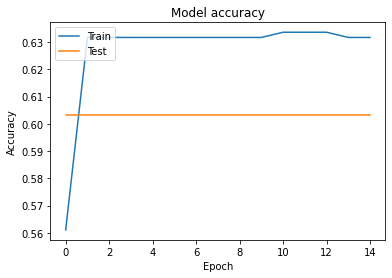

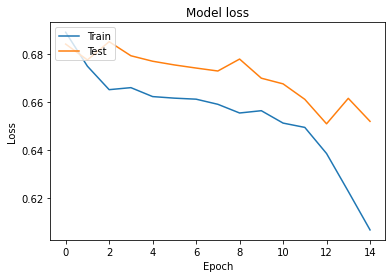

In [0]:
plot_history(history)

In [0]:
pred = model_gru.predict(x_test)
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred),
    'precision': precision_score(y_test, pred)
}

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.6276923076923077, 'f1': 0.0, 'precision': 0.0, 'recall': 0.0}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[204,   0],
       [121,   0]], dtype=int32)>

# RNN Bidireccional

In [0]:
model_bigru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 256)           330240    
_________________________________________________________________
dropout (Dropout)            (None, 50, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
history = model_bigru.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
6/6 [==============================] - 1s 205ms/step - loss: 0.6793 - accuracy: 0.6221 - val_loss: 0.6705 - val_accuracy: 0.6031
Epoch 2/15
6/6 [==============================] - 0s 43ms/step - loss: 0.6545 - accuracy: 0.6317 - val_loss: 0.6441 - val_accuracy: 0.6031
Epoch 3/15
6/6 [==============================] - 0s 43ms/step - loss: 0.5707 - accuracy: 0.7214 - val_loss: 0.5740 - val_accuracy: 0.7252
Epoch 4/15
6/6 [==============================] - 0s 42ms/step - loss: 0.3990 - accuracy: 0.8702 - val_loss: 0.5835 - val_accuracy: 0.7481
Epoch 5/15
6/6 [==============================] - 0s 45ms/step - loss: 0.2355 - accuracy: 0.9485 - val_loss: 0.6805 - val_accuracy: 0.7405
Epoch 6/15
6/6 [==============================] - 0s 42ms/step - loss: 0.1066 - accuracy: 0.9695 - val_loss: 0.8274 - val_accuracy: 0.7557
Epoch 7/15
6/6 [==============================] - 0s 43ms/step - loss: 0.0711 - accuracy: 0.9828 - val_loss: 0.9836 - val_accuracy: 0.7405
Epoch 8/15
6/6 [==========

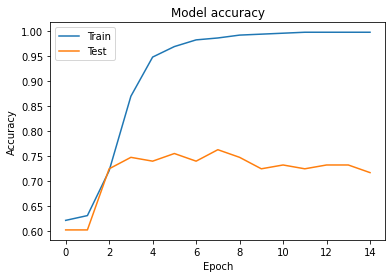

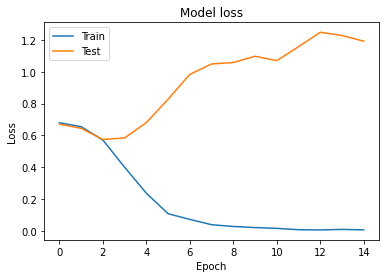

In [0]:
plot_history(history)

In [0]:
pred = model_bigru.predict(x_test)
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred),
    'precision': precision_score(y_test, pred)
}

{'accuracy': 0.7876923076923077,
 'f1': 0.7038626609442059,
 'precision': 0.7321428571428571,
 'recall': 0.6776859504132231}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[174,  30],
       [ 39,  82]], dtype=int32)>

# Embedding preentrenado

In [0]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

#load model
w2v_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in w2v_model:
        embedding_matrix[i] = w2v_model[word]

--2020-05-31 02:04:18--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.146.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.146.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  19.5MB/s    in 43s     

2020-05-31 02:05:02 (36.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# RNN con embedding preentrenado

In [0]:
model_gru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru_pre.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru_pre.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
gru_6 (GRU)                  (None, 128)               165120    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_gru_pre.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_validation, y_validation))

Epoch 1/20
6/6 [==============================] - 1s 85ms/step - loss: 0.6898 - accuracy: 0.6202 - val_loss: 0.6847 - val_accuracy: 0.6031
Epoch 2/20
6/6 [==============================] - 0s 33ms/step - loss: 0.6740 - accuracy: 0.6317 - val_loss: 0.6690 - val_accuracy: 0.6031
Epoch 3/20
6/6 [==============================] - 0s 34ms/step - loss: 0.6492 - accuracy: 0.6317 - val_loss: 0.6754 - val_accuracy: 0.6031
Epoch 4/20
6/6 [==============================] - 0s 34ms/step - loss: 0.6449 - accuracy: 0.6317 - val_loss: 0.6563 - val_accuracy: 0.6031
Epoch 5/20
6/6 [==============================] - 0s 34ms/step - loss: 0.6394 - accuracy: 0.6355 - val_loss: 0.6533 - val_accuracy: 0.6031
Epoch 6/20
6/6 [==============================] - 0s 34ms/step - loss: 0.6287 - accuracy: 0.6374 - val_loss: 0.6526 - val_accuracy: 0.6031
Epoch 7/20
6/6 [==============================] - 0s 33ms/step - loss: 0.6036 - accuracy: 0.6355 - val_loss: 0.6408 - val_accuracy: 0.6031
Epoch 8/20
6/6 [===========

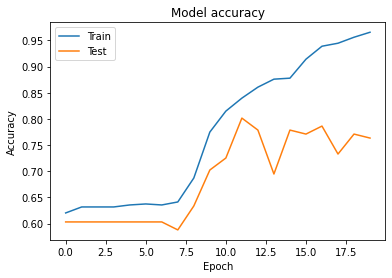

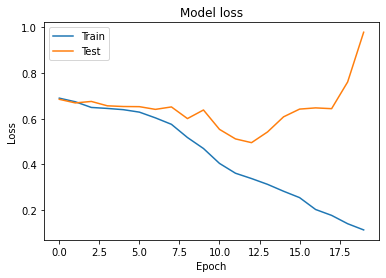

In [0]:
plot_history(history)

In [0]:
pred = model_gru_pre.predict(x_test)
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred),
    'precision': precision_score(y_test, pred)
}

{'accuracy': 0.8215384615384616,
 'f1': 0.7542372881355932,
 'precision': 0.7739130434782608,
 'recall': 0.7355371900826446}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[155,  49],
       [ 18, 103]], dtype=int32)>

In [0]:
# Dejo comentado el código para guardar y cargar
#modelFileName = 'gru_pre_2020-05-30_1355'
#modelFullPath = path + 'Modelos/' + modelFileName
#model_gru_pre.save(modelFullPath)
#new_model = tf.keras.models.load_model(modelFullPath)
#new_model.summary()

# RNN Bidireccional con embedding preentrenado

In [0]:
model_bigru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_bigru_pre.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru_pre.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 256)           330240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [0]:
history = model_bigru_pre.fit(x_train, y_train, batch_size=100, epochs=15, validation_data=(x_validation, y_validation))

Epoch 1/15
6/6 [==============================] - 1s 208ms/step - loss: 0.6845 - accuracy: 0.5763 - val_loss: 0.6449 - val_accuracy: 0.7405
Epoch 2/15
6/6 [==============================] - 0s 44ms/step - loss: 0.5857 - accuracy: 0.7920 - val_loss: 0.5477 - val_accuracy: 0.7252
Epoch 3/15
6/6 [==============================] - 0s 44ms/step - loss: 0.4282 - accuracy: 0.8206 - val_loss: 0.5645 - val_accuracy: 0.7557
Epoch 4/15
6/6 [==============================] - 0s 44ms/step - loss: 0.3744 - accuracy: 0.8397 - val_loss: 0.5358 - val_accuracy: 0.7786
Epoch 5/15
6/6 [==============================] - 0s 44ms/step - loss: 0.3140 - accuracy: 0.8740 - val_loss: 0.5537 - val_accuracy: 0.7481
Epoch 6/15
6/6 [==============================] - 0s 47ms/step - loss: 0.2301 - accuracy: 0.9141 - val_loss: 0.5421 - val_accuracy: 0.7939
Epoch 7/15
6/6 [==============================] - 0s 44ms/step - loss: 0.1764 - accuracy: 0.9427 - val_loss: 0.5804 - val_accuracy: 0.7481
Epoch 8/15
6/6 [==========

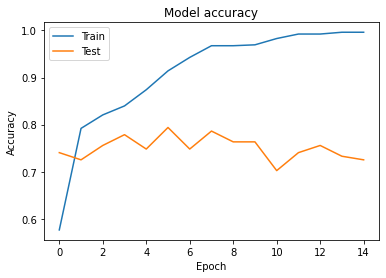

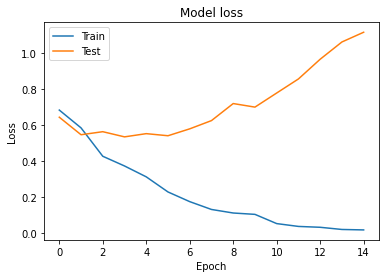

In [0]:
plot_history(history)

In [0]:
pred = model_bigru_pre.predict(x_test)
pred = pred[:,0] > 0.5
{
    'f1' : f1_score(y_test, pred),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred),
    'precision': precision_score(y_test, pred)
}

{'accuracy': 0.8123076923076923,
 'f1': 0.7426160337552743,
 'precision': 0.7586206896551724,
 'recall': 0.7272727272727273}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[176,  28],
       [ 33,  88]], dtype=int32)>

In [0]:
# Guardo el modelo que dio mejor hasta ahora
modelFileName = 'news_gru_pre_2020-05-30_2323'
modelFullPath = path + 'Modelos/' + modelFileName
#model_gru_pre.save(modelFullPath)
#new_model = tf.keras.models.load_model(modelFullPath)
#new_model.summary()

INFO:tensorflow:Assets written to: /content/drive/My Drive/Datamining/TextMining/Modelos/news_gru_pre_2020-05-30_2323/assets
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
gru_6 (GRU)                  (None, 128)               165120    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 3,166,831
Trainable params: 3,166,831
Non-trainable params: 0
___________________________________________________